In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customer_df = pd.read_excel('/content/Customers.xlsx')
product_df = pd.read_excel('/content/Products.xlsx')
sales_df = pd.read_excel('/content/Sales.xlsx')

In [4]:
#Task 1 part A, B and C

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer_ID    9994 non-null   object        
 1   First Name     9986 non-null   object        
 2   Last Name      9986 non-null   object        
 3   Date of Birth  9994 non-null   datetime64[ns]
 4   Address        9994 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 390.5+ KB


In [6]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_ID    9994 non-null   object
 1   product_name  9994 non-null   object
 2   segment       9994 non-null   object
 3   category      9994 non-null   object
 4   subcategory   9994 non-null   object
 5   Price         9994 non-null   int64 
 6   quantity      9994 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 546.7+ KB


In [7]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     9994 non-null   object
 1   order_date   9994 non-null   object
 2   ship_date    9994 non-null   object
 3   Product_ID   9994 non-null   object
 4   Customer_ID  9994 non-null   object
dtypes: object(5)
memory usage: 390.5+ KB


In [8]:
#Task 1 Part D (Number of missing values for each attribute)
missing_values = customer_df.isnull().sum()
print('Missing values of customer table:')
print(missing_values)

print()

missing_values = product_df.isnull().sum()
print('Missing values of product table:')
print(missing_values)

print()

missing_values = sales_df.isnull().sum()
print('Missing values of sales table:')
print(missing_values)

Missing values of customer table:
Customer_ID      0
First Name       8
Last Name        8
Date of Birth    0
Address          0
dtype: int64

Missing values of product table:
Product_ID      0
product_name    0
segment         0
category        0
subcategory     0
Price           0
quantity        0
dtype: int64

Missing values of sales table:
order_id       0
order_date     0
ship_date      0
Product_ID     0
Customer_ID    0
dtype: int64


In [9]:
#Task 1 Part E (Entry errors for each attribute)

print('Negative or zero prices:')
print(product_df[product_df['Price'] <= 0])

print()

print('Negative or zero quantities:')
print(product_df[product_df['quantity'] <= 0])

print()


# Identifying rows where 'First Name' or 'Last Name' is not a string
invalid_first_names = customer_df[customer_df['First Name'].map(type) != str]
invalid_last_names = customer_df[customer_df['Last Name'].map(type) != str]

print("Rows with non-string First Names:")
print(invalid_first_names)

print("\nRows with non-string Last Names:")
print(invalid_last_names)



Negative or zero prices:
Empty DataFrame
Columns: [Product_ID, product_name, segment, category, subcategory, Price, quantity]
Index: []

Negative or zero quantities:
Empty DataFrame
Columns: [Product_ID, product_name, segment, category, subcategory, Price, quantity]
Index: []

Rows with non-string First Names:
      Customer_ID First Name Last Name Date of Birth  \
613   CUST-TZ8VLS        NaN       NaN    1987-10-13   
614   CUST-3MOMUJ        NaN       NaN    1987-10-13   
1708  CUST-GNPR69        NaN       NaN    1987-10-13   
1936  CUST-OT1NRO        NaN       NaN    1987-10-13   
1937  CUST-KYSB2D        NaN       NaN    1987-10-13   
2844  CUST-A5ZPLM        NaN       NaN    1987-10-13   
2845  CUST-H4R8VF        NaN       NaN    1987-10-13   
5020  CUST-LIZEY3        NaN       NaN    1987-10-13   

                                       Address  
613   50319 Romero Summit, Sethburgh, WY 87908  
614   50319 Romero Summit, Sethburgh, WY 87908  
1708  50319 Romero Summit, Sethburgh

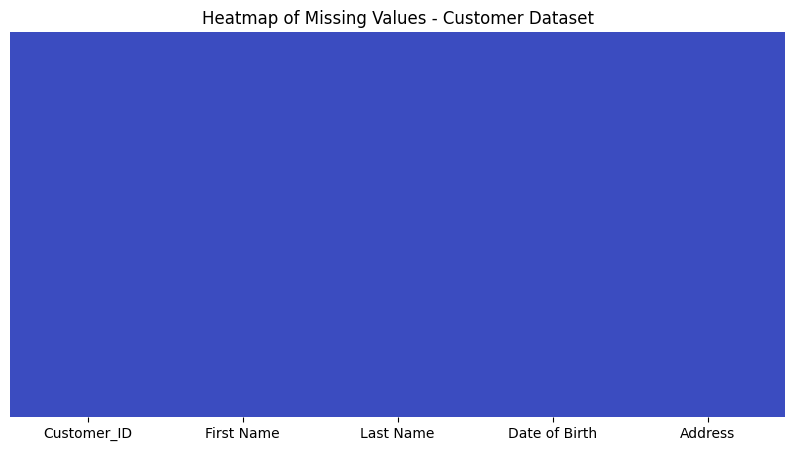

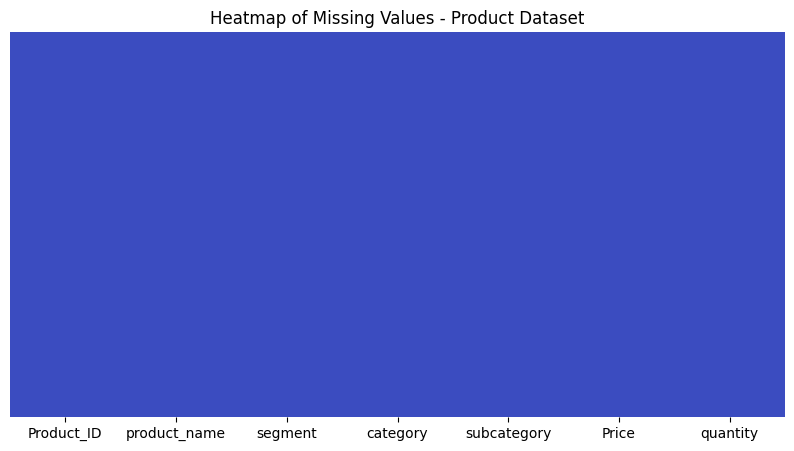

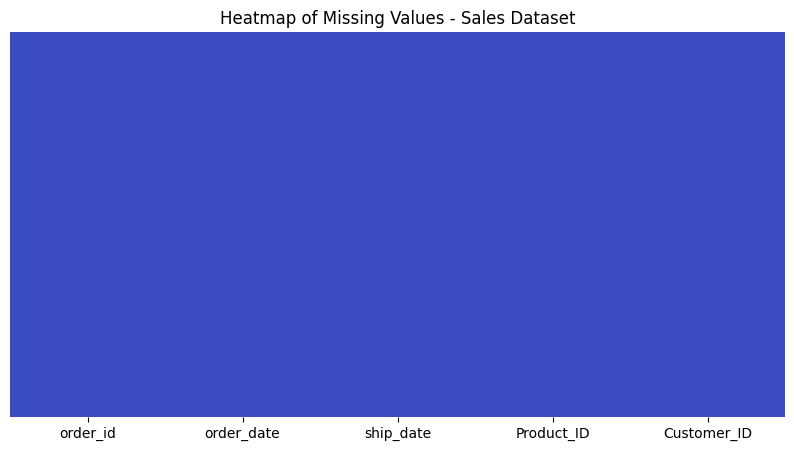

In [18]:
#Task 1 part F (Creating Heatmaps for missing data)
datasets = {'Customer': customer_df, 'Product': product_df, 'Sales': sales_df}

for name, df in datasets.items():
    plt.figure(figsize=(10, 5))
    sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm', yticklabels=False)
    plt.title(f'Heatmap of Missing Values - {name} Dataset')
    plt.show()


In [11]:
#Task 2 part i
temp_df = pd.merge(sales_df, customer_df, on='Customer_ID', how='left')
merged_df = pd.merge(temp_df, product_df, on='Product_ID', how='left')


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9994 non-null   object        
 1   order_date     9994 non-null   object        
 2   ship_date      9994 non-null   object        
 3   Product_ID     9994 non-null   object        
 4   Customer_ID    9994 non-null   object        
 5   First Name     9986 non-null   object        
 6   Last Name      9986 non-null   object        
 7   Date of Birth  9994 non-null   datetime64[ns]
 8   Address        9994 non-null   object        
 9   product_name   9994 non-null   object        
 10  segment        9994 non-null   object        
 11  category       9994 non-null   object        
 12  subcategory    9994 non-null   object        
 13  Price          9994 non-null   int64         
 14  quantity       9994 non-null   int64         
dtypes: datetime64[ns](1),

In [13]:
merged_df.to_excel('merged_df.xlsx', index=False)

In [14]:
#Task 2 part ii (Adding Two data cleaning Procedures)

# (1) Identifying duplicate values and removing them
merged_df = merged_df.drop_duplicates(subset=['order_date', 'ship_date', 'First Name', 'Last Name', 'Date of Birth', 'Address', 'product_name', 'segment', 'category', 'subcategory', 'Price', 'quantity'], keep='first')
print()
print('Duplicate rows if any were removed.')

# (2) Filtering data to include products with price greater than $20
merged_df = merged_df[merged_df['Price'] >= 20]
print(merged_df)




Duplicate rows if any were removed.
            order_id  order_date  ship_date  Product_ID  Customer_ID  \
0     US-2020-103800    1/3/2019   1/7/2019  PRD-3IQD2D  CUST-2KDH34   
1     US-2020-112326    1/4/2019   1/8/2019  PRD-4A54ZW  CUST-P7RZU1   
2     US-2020-112326    1/4/2019   1/8/2019  PRD-MYUI07  CUST-6FNIKT   
3     US-2020-112326    1/4/2019   1/8/2019  PRD-E19KEP  CUST-3547GB   
4     US-2020-141817    1/5/2019  1/12/2019  PRD-T9JVJA  CUST-K6RT7V   
...              ...         ...        ...         ...          ...   
9989  US-2023-126221  12/30/2022   1/5/2023  PRD-G1GNE4  CUST-ZFQQ9H   
9990  US-2023-143259  12/30/2022   1/3/2023  PRD-3GABPX  CUST-GNPFOL   
9991  US-2023-143259  12/30/2022   1/3/2023  PRD-Q521ZJ  CUST-2KXSUR   
9992  US-2023-143259  12/30/2022   1/3/2023  PRD-1H9E6H  CUST-T9OR7R   
9993  US-2023-156720  12/30/2022   1/3/2023  PRD-SLDUQ8  CUST-D7I9KI   

     First Name  Last Name Date of Birth  \
0        Darren     Powers    1942-03-26   
1      Phi

In [15]:
#Task 2 part iii (Add Two feature engineering procedures)
# (1) Identifying and replacing missing values with (NULL)
missing_values = merged_df.isnull().sum()
print('Missing values per attribute:')
print(missing_values)
print()
print('The merged file has been updated')
merged_df = merged_df.fillna('(NULL)')

# (2) Creating a new column, Total Purchase Value
merged_df['Total Purchase Value'] = merged_df['quantity'] * merged_df['Price']
merged_df.head()

Missing values per attribute:
order_id         0
order_date       0
ship_date        0
Product_ID       0
Customer_ID      0
First Name       8
Last Name        8
Date of Birth    0
Address          0
product_name     0
segment          0
category         0
subcategory      0
Price            0
quantity         0
dtype: int64

The merged file has been updated


,order_id,order_date,ship_date,Product_ID,Customer_ID,First Name,Last Name,Date of Birth,Address,product_name,segment,category,subcategory,Price,quantity,Total Purchase Value
0,US-2020-103800,1/3/2019,1/7/2019,PRD-3IQD2D,CUST-2KDH34,Darren,Powers,1942-03-26,"228 Keith Branch, Meyersfurt, DC 88097","Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,399,2,798
1,US-2020-112326,1/4/2019,1/8/2019,PRD-4A54ZW,CUST-P7RZU1,Phillina,Ober,1979-10-02,"12542 Andrew Lake Suite 970, Lake Amy, IN 11717",GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,137,2,274
2,US-2020-112326,1/4/2019,1/8/2019,PRD-MYUI07,CUST-6FNIKT,Phillina,Ober,1979-10-02,"12542 Andrew Lake Suite 970, Lake Amy, IN 11717",Avery 508,Home Office,Office Supplies,Labels,388,3,1164
3,US-2020-112326,1/4/2019,1/8/2019,PRD-E19KEP,CUST-3547GB,Phillina,Ober,1979-10-02,"12542 Andrew Lake Suite 970, Lake Amy, IN 11717",SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,104,3,312
4,US-2020-141817,1/5/2019,1/12/2019,PRD-T9JVJA,CUST-K6RT7V,Mick,Brown,1993-12-01,"7775 Garcia Rapids Apt. 503, Andreashire, VT 5...",Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,303,3,909


In [16]:
merged_df.to_excel('merged_df.xlsx', index=False)

In [17]:
# Task 2 Part IV (Creating the metadata file for the final (merged_df) dataset.)
column_descriptions = {
    'order_id': 'Uniquekly identifies each order',
    'order_date': 'Date when the order was placed',
    'ship_date': 'Date when the order was shipped',
    'Product_ID': 'Unique identifier for each product',
    'Customer_ID': 'Unique identifier for each customer',
    'First Name': 'First name of customer',
    'Last Name': 'Last Name of customer',
    'Date of Birth': 'Customer’s date of birth',
    'Address': 'Customer’s address',
    'product_name': 'Name of the product',
    'segment': 'Product segment',
    'category': 'Main category of the product',
    'subcategory': 'Subcategory of the product',
    'Price': 'Price of the product',
    'quantity': 'Quantity of product ordered'
}

metadata = pd.DataFrame({
    'Column Name': merged_df.columns,
    'Data Type': merged_df.dtypes,
    'Description': [column_descriptions.get(col, 'No description provided') for col in merged_df.columns]
})



numerical_stats = merged_df.describe().transpose()
numerical_stats = numerical_stats[['mean', '50%', 'std', 'min', 'max']].rename(columns={
    '50%': 'median'
})
numerical_stats.reset_index(inplace=True)
numerical_stats.rename(columns={'index': 'Column Name'}, inplace=True)
categorical_stats = merged_df.select_dtypes(include=['object', 'category']).nunique().reset_index()
categorical_stats.columns = ['Column Name', 'Unique Values']


metadata = metadata.merge(numerical_stats, on='Column Name', how='left')
metadata = metadata.merge(categorical_stats, on='Column Name', how='left')

metadata.to_csv('metadata.csv', index=False)



In [21]:
#Task 3 Data Loading

import sqlite3
conn = sqlite3.connect("retaildb")
cur = conn.cursor()


In [20]:
merged_df.to_sql("data_table", conn, if_exists='replace', index=False)
conn.close()

In [22]:
query = "SELECT * FROM data_table;"
all_data = pd.read_sql(query, conn)

print(all_data)

            order_id  order_date  ship_date  Product_ID  Customer_ID  \
0     US-2020-103800    1/3/2019   1/7/2019  PRD-3IQD2D  CUST-2KDH34   
1     US-2020-112326    1/4/2019   1/8/2019  PRD-4A54ZW  CUST-P7RZU1   
2     US-2020-112326    1/4/2019   1/8/2019  PRD-MYUI07  CUST-6FNIKT   
3     US-2020-112326    1/4/2019   1/8/2019  PRD-E19KEP  CUST-3547GB   
4     US-2020-141817    1/5/2019  1/12/2019  PRD-T9JVJA  CUST-K6RT7V   
...              ...         ...        ...         ...          ...   
9664  US-2023-126221  12/30/2022   1/5/2023  PRD-G1GNE4  CUST-ZFQQ9H   
9665  US-2023-143259  12/30/2022   1/3/2023  PRD-3GABPX  CUST-GNPFOL   
9666  US-2023-143259  12/30/2022   1/3/2023  PRD-Q521ZJ  CUST-2KXSUR   
9667  US-2023-143259  12/30/2022   1/3/2023  PRD-1H9E6H  CUST-T9OR7R   
9668  US-2023-156720  12/30/2022   1/3/2023  PRD-SLDUQ8  CUST-D7I9KI   

     First Name  Last Name        Date of Birth  \
0        Darren     Powers  1942-03-26 00:00:00   
1      Phillina       Ober  1979-